<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/ML/blob/main/colab_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# CS550: ML - Lab

## Assignment - 3

### 18/09/2024

</div>

---

<div align="center">

**Name:** Ayush Kumar Mishra  
**Roll No:** 12240340

</div>


## Multilabel Classification

# Mathematical Description

- **Model**: For each label \( k \), a separate binary logistic regression model is trained. The probability of each label \( k \) being relevant is:

$$ P(y_k = 1 | X) = \frac{1}{1 + e^{-(\beta_k^T X)}} $$

Where:
- $ \beta_k $ are the coefficients for the $ k $-th label.

- **Objective**: Minimize the binary cross-entropy loss function for each label separately and then aggregate the loss:

$$ \text{Loss Function} = - \frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} \left[ y_{i,k} \log(\hat{p}_{i,k}) + (1 - y_{i,k}) \log(1 - \hat{p}_{i,k}) \right] $$

Where $ y_{i,k} $ indicates whether label $ k $ is present for the $ i $-th instance, and $ \hat{p}_{i,k} $ is the predicted probability for label $ k $.


### Q. Perform multilabel classification on Yeast dataset. You can get the dataset using sklearn. Submit the ipynb file on the canvas portal.

## Importing all the necessary Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_wine
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score


## Reading the data and checking its shape to get a idea about its class lables and its number

In [ ]:
# Read the CSV file
dataset = pd.read_csv('/content/yeast.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :103]
y = dataset.iloc[:, 103:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (2417, 117)
X.shape: (2417, 103)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


y.shape: (2417, 14)


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


Descriptive stats:


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


## STANDARDISE THE DATA FOR UNIFORM SCALING AND COMPARISON


Standardization ensures that the features have a mean of 0 and a standard deviation of 1, making them comparable and helping models converge faster.

In [44]:
# Z-score normalization
X = (X - X.mean()) / X.std()

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (1691, 103)
X_test.shape: (726, 103)
y_train.shape: (1691, 14)
y_test.shape: (726, 14)


### Instantiating the Multi-Output Classifier


A **Multi-Output Classifier** is used with **logistic regression** as the base model to handle multiple labels simultaneously.

- The model is trained using the input features (`X_train`) and corresponding labels (`y_train`).
- After training, predictions are made on the test set (`X_test`).
- The shape of `y_pred` is printed to confirm the number of predicted instances and labels.


In [ ]:
# instantiate the classifier
br_clf = MultiOutputClassifier(LogisticRegression())
# fit
br_clf.fit(X_train, y_train)
# predict
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (726, 14)


In [ ]:
# Print column names
print(y_train.columns)


Index(['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7',
       'Class8', 'Class9', 'Class10', 'Class11', 'Class12', 'Class13',
       'Class14'],
      dtype='object')


## Checking the Accuracy for each label

In [ ]:

print("Accuracy per label:")
for i, label in enumerate(y_train.columns):
    # Compute and print accuracy for each label
    print(f"{label} Accuracy: {accuracy_score(y_test.iloc[:, i], y_pred[:, i]):.2f}")


Accuracy per label:
Class1 Accuracy: 0.78
Class2 Accuracy: 0.60
Class3 Accuracy: 0.68
Class4 Accuracy: 0.74
Class5 Accuracy: 0.75
Class6 Accuracy: 0.76
Class7 Accuracy: 0.84
Class8 Accuracy: 0.80
Class9 Accuracy: 0.92
Class10 Accuracy: 0.90
Class11 Accuracy: 0.89
Class12 Accuracy: 0.72
Class13 Accuracy: 0.70
Class14 Accuracy: 0.99


## Calculating the confusion matrix to :
- Evaluates the performance of the classifier by comparing the
1. predicted labels against the true labels
2. showing the number of true positives, true negatives, false positives, and false negatives for each class.

Confusion Matrix for label 'Class1':
[[452  36]
 [122 116]]
Confusion Matrix for label 'Class2':
[[303 102]
 [188 133]]
Confusion Matrix for label 'Class3':
[[328 115]
 [115 168]]
Confusion Matrix for label 'Class4':
[[400  82]
 [106 138]]
Confusion Matrix for label 'Class5':
[[463  46]
 [135  82]]
Confusion Matrix for label 'Class6':
[[517  33]
 [144  32]]
Confusion Matrix for label 'Class7':
[[608   3]
 [110   5]]
Confusion Matrix for label 'Class8':
[[578   9]
 [135   4]]
Confusion Matrix for label 'Class9':
[[668   0]
 [ 58   0]]
Confusion Matrix for label 'Class10':
[[650   1]
 [ 75   0]]
Confusion Matrix for label 'Class11':
[[645   1]
 [ 79   1]]
Confusion Matrix for label 'Class12':
[[ 11 183]
 [ 23 509]]
Confusion Matrix for label 'Class13':
[[ 11 188]
 [ 28 499]]
Confusion Matrix for label 'Class14':
[[716   0]
 [ 10   0]]


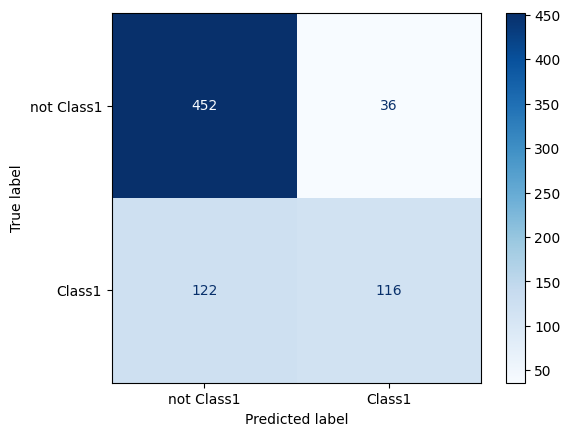

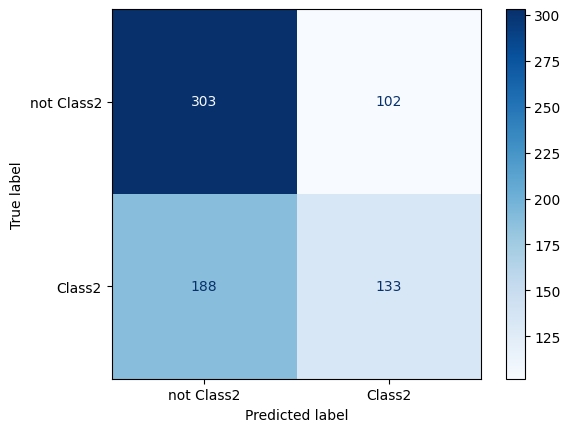

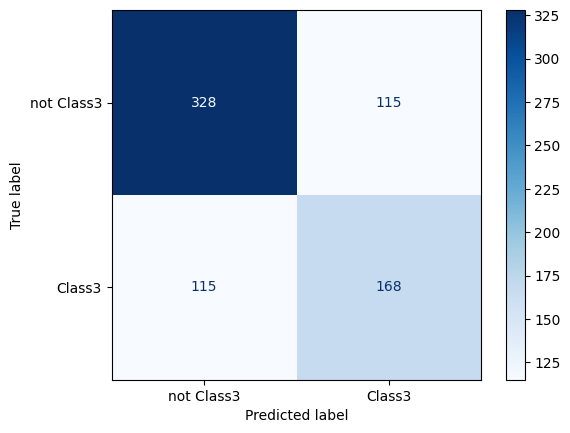

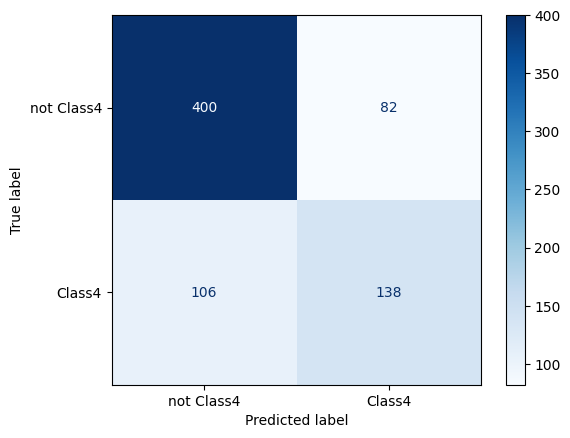

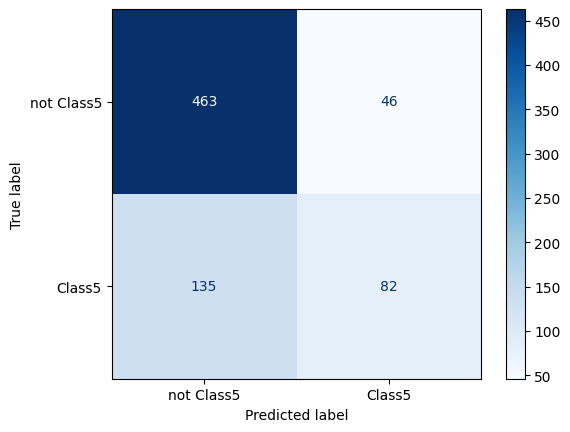

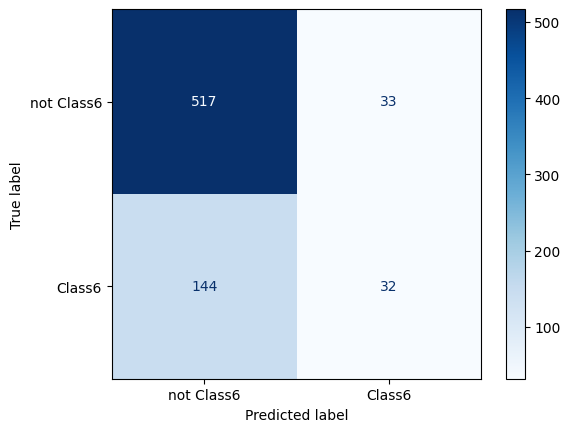

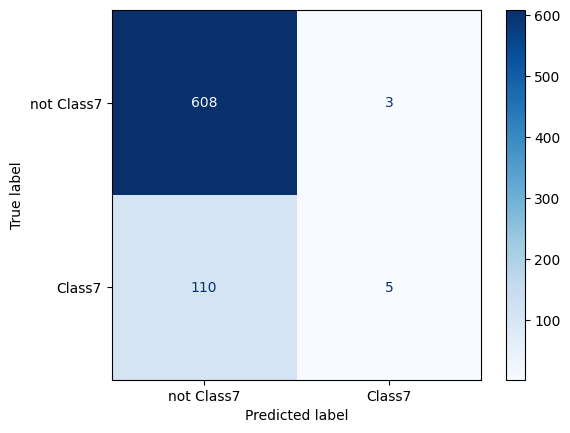

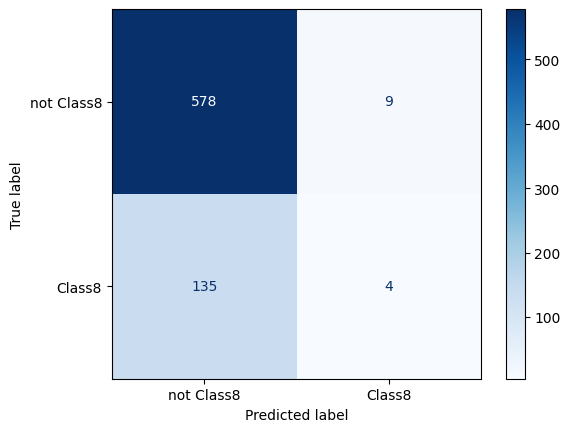

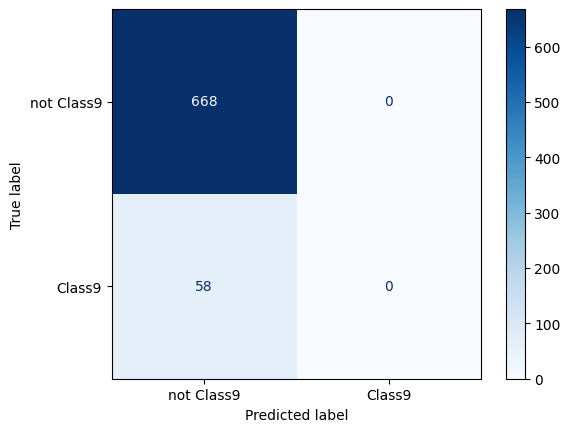

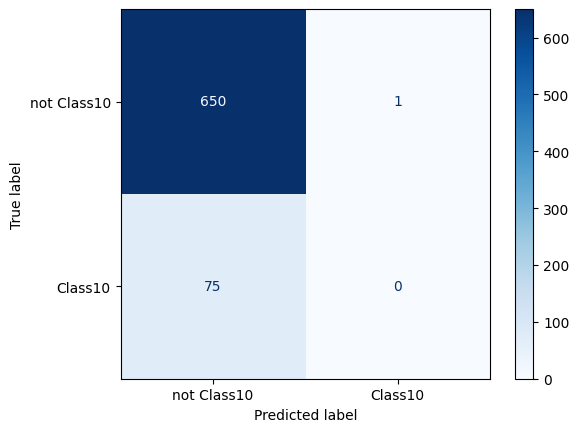

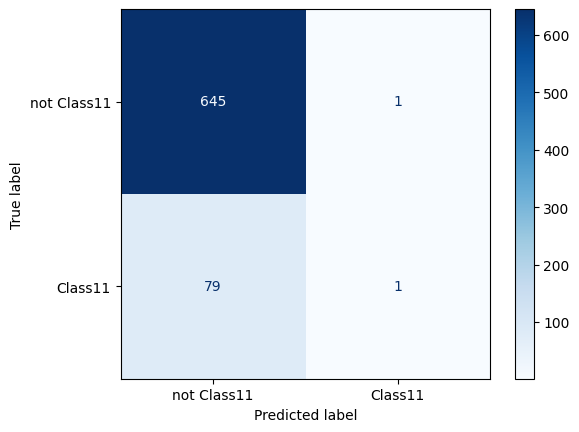

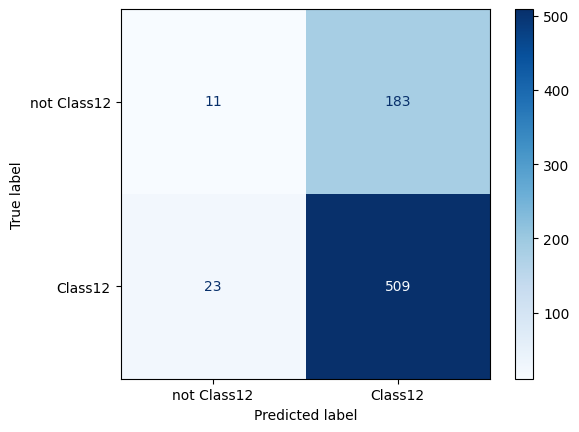

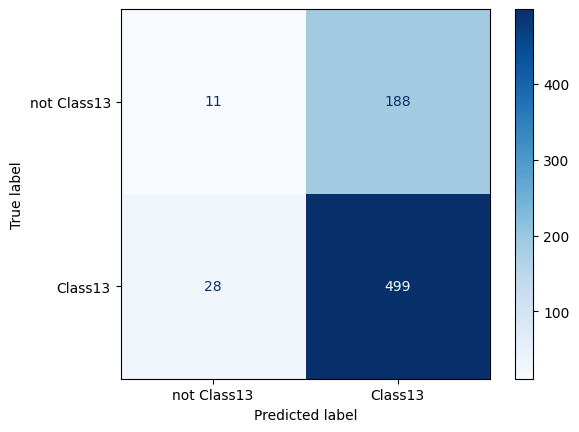

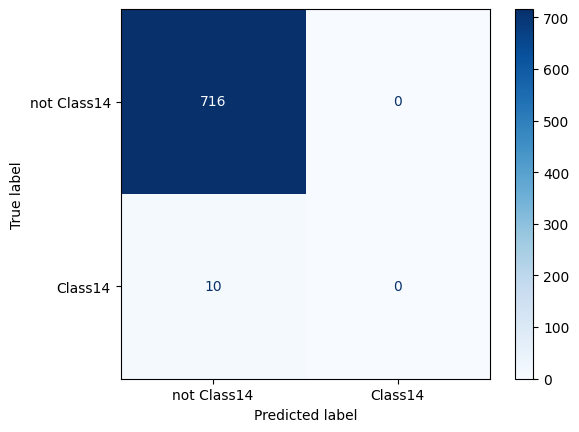

In [ ]:
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

for i, label in enumerate(y_train.columns):
    print(f"Confusion Matrix for label '{label}':")
    print(confusion_matrices[i])
    disp = ConfusionMatrixDisplay(confusion_matrices[i], display_labels=[f"not {label}", label])
    disp.plot(cmap="Blues")

## 2. Calculating Precision, Recall, and F1 Score

After computing the confusion matrices:

- **Precision**: Measure the proportion of true positive predictions out of all positive predictions made by the model.

- **Recall**: Measure the proportion of true positive predictions out of all actual positive cases

- **F1 Score**: Calculate the harmonic mean of precision and recall.



In [48]:
y_test_array = y_test.to_numpy() if isinstance(y_test, pd.DataFrame) else y_test
y_pred_array = y_pred.to_numpy() if isinstance(y_pred, pd.DataFrame) else y_pred

# Iterate through each label and calculate the metrics
for i, label in enumerate(y_train.columns):

    true_labels = y_test_array[:, i]
    predicted_labels = y_pred_array[:, i]

    # Calculate Precision, Recall, and F1 Score for each label
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    # Print the metrics for each label
    print(f"Metrics for label '{label}':")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")


Metrics for label 'Class1':
Precision: 0.76
Recall: 0.49
F1 Score: 0.59


Metrics for label 'Class2':
Precision: 0.57
Recall: 0.41
F1 Score: 0.48


Metrics for label 'Class3':
Precision: 0.59
Recall: 0.59
F1 Score: 0.59


Metrics for label 'Class4':
Precision: 0.63
Recall: 0.57
F1 Score: 0.59


Metrics for label 'Class5':
Precision: 0.64
Recall: 0.38
F1 Score: 0.48


Metrics for label 'Class6':
Precision: 0.49
Recall: 0.18
F1 Score: 0.27


Metrics for label 'Class7':
Precision: 0.62
Recall: 0.04
F1 Score: 0.08


Metrics for label 'Class8':
Precision: 0.31
Recall: 0.03
F1 Score: 0.05


Metrics for label 'Class9':
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


Metrics for label 'Class10':
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


Metrics for label 'Class11':
Precision: 0.50
Recall: 0.01
F1 Score: 0.02


Metrics for label 'Class12':
Precision: 0.74
Recall: 0.96
F1 Score: 0.83


Metrics for label 'Class13':
Precision: 0.73
Recall: 0.95
F1 Score: 0.82


Metrics for label 'Class14':
Preci